### 3.2 공공데이터 로드하고 데이터 미리보기

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns

#### 시각화를 위한 폰트

In [22]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')


#### 데이터 로드하기

In [23]:
df = pd.read_csv("data/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv", low_memory=False)
# 몇행 몇열인지 확인
df.shape

(91335, 39)

#### 데이터 미리보기

In [24]:
# head로 미리보기 가능
# shift + tab키로 docstring을 볼 수 있다
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344


In [25]:
df.tail(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
91334,16109073,천안김안과천안역본점의원,NaN,S,의료,S01,병원,S01B13,안과의원,Q86201,...,4413110700102660017016314,김안과,충청남도 천안시 동남구 중앙로 92,330952.0,31127.0,NaN,NaN,NaN,127.152651,36.80664


In [26]:
# 데이터 요약보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

#### 결측치 다루기

In [27]:
# df.isnull()로 null값을 boolean 타입으로 확인, sum()로 null의 갯수 합쳐서 확인
null_count = df.isnull().sum()

<Axes: >

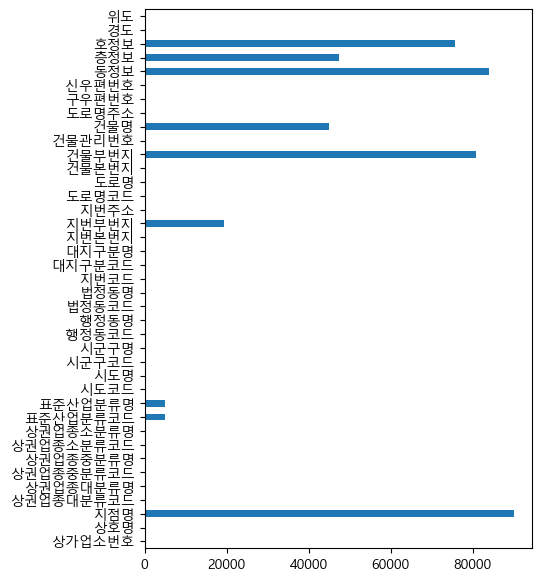

In [36]:
# 가로형태의 bar 그래프 (barh)로 나타내고 그래프가 겹쳐보이니까 figsize를 (5,7)의 크기로 나타낸다.
null_count.plot.barh(figsize=(5,7))

In [39]:
# 데이터 프레임 형태로 변환
df_null_count = null_count.reset_index()
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


In [43]:
# 컬럼명 변경
df_null_count.columns = ["컬럼명", "결측치수"]
df_null_count.head()

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


In [48]:
# 결측치가 많은 순으로 정렬하기 
df_null_count_top=df_null_count.sort_values(by="결측치수", ascending=False).head(10)

In [52]:
# 결측치가 많은 상위 10개의 column명을 배열의 형태로 drop_columns에 저장
drop_columns = df_null_count_top["컬럼명"].tolist()
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [54]:
# 데이터 프레임에서 drop_columns에 해당하는 것만 보여줌
df[drop_columns].head()

,지점명,동정보,건물부번지,호정보,층정보,건물명,지번부번지,표준산업분류코드,표준산업분류명,시도코드
0,NaN,NaN,NaN,NaN,NaN,산호한양아파트,NaN,Q86201,일반 의원,41.0
1,NaN,NaN,NaN,NaN,4,NaN,14.0,Q86201,일반 의원,11.0
2,NaN,NaN,NaN,NaN,NaN,한라프라자,1.0,Q86201,일반 의원,41.0
3,NaN,NaN,NaN,NaN,5,NaN,1.0,NaN,NaN,26.0
4,수지점,NaN,NaN,NaN,1,NaN,2.0,G47811,의약품 및 의료용품 소매업,41.0


In [56]:
# 제거하기 / 열을 기준으로 제거하는 거기 때문에 axis를 1로 지정
print(df.shape)
df = df.drop(drop_columns, axis=1)
print(df.shape)

(91335, 39)
(91335, 29)


#### 3.4  수치 데이터 요약하기

In [63]:
# 수치형 데이터에서만 기초 통계값을 사용할 수 있다
# 평균값
df["위도"].mean()

36.62471119236685

In [62]:
# 중간값
df["위도"].median()

37.2346523177033

In [64]:
# 최댓값
df["위도"].max()

38.4996585705598

In [65]:
# 최솟값
df["위도"].min()

33.2192896688307

In [66]:
# 갯수
df["위도"].count()

91335

In [67]:
# 위에 나온 값 한 번에 출력
df["위도"].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [68]:
# 판다스 라이브러리에서 2개 이상의 값을 출력하려면 array형태로 입력해야한다.
df[["위도","경도"]].describe()

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084550
75%,37.507463,128.108919
max,38.499659,130.909912


In [69]:
# descrive로 문자열 데이터타입의 요약 확인하기
# top은 가장 많이 나온 문자, freq은 얼만큼 자주 나왔냐가 나온다.
df.describe(include="object")

,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,건물관리번호,도로명주소
count,91335,91335,91335,91335,91335,91335,91335,90956,90956,90956,91280,91335,91335,91335,91335,91335
unique,56910,1,1,5,5,34,34,17,228,2791,2822,2,53118,16610,54142,54031
top,리원,S,의료,S01,병원,S02A01,약국,경기도,서구,중앙동,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,1123010300109650001031604,서울특별시 동대문구 약령중앙로8길 10
freq,152,91335,91335,60774,60774,18964,18964,21374,3165,1856,874,91213,198,326,198,198


In [72]:
# describe에서 나온 ubique값을 확인하는 방법
df["상권업종중분류명"].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [73]:
# unique 값의 개수 확인 방법1
df["상권업종중분류명"].nunique()

5

In [74]:
# unique 값의 개수 확인 방법2
len(df["상권업종중분류명"].unique())

5

##### 그룹화된 요약값 보기

In [75]:
# 시도코드는 위에서 결측치 제거해서 확인 불가, 시도명으로 확인
df["시도명"].head()

0      경기도
1    서울특별시
2      경기도
3    부산광역시
4      경기도
Name: 시도명, dtype: object

In [77]:
# 시도명의 각 column에서의 개수 확인
df["시도명"].value_counts()

시도명
경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: count, dtype: int64

<Axes: ylabel='시도명'>

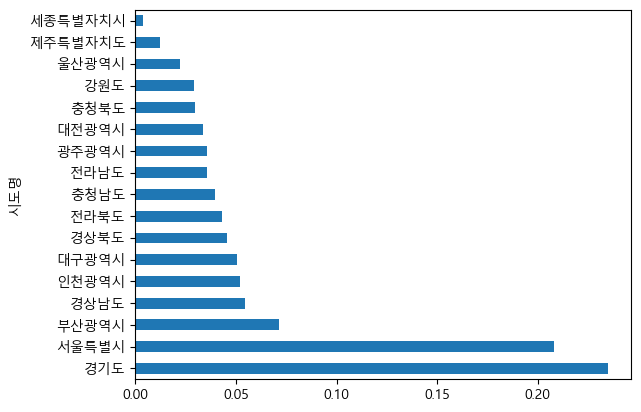

In [94]:
# normalize 옵션을 통해서 각 부분이 얼만큼의 비율을 가지고 있는지 확인 가능하다.
city_normalize = df["시도명"].value_counts(normalize=True)
city_normalize.plot.barh() 
#plot 그래프의 속성에서 rot(rotation)속성으로 글씨를 회전시킬 수 있다.

<Axes: xlabel='count', ylabel='시도명'>

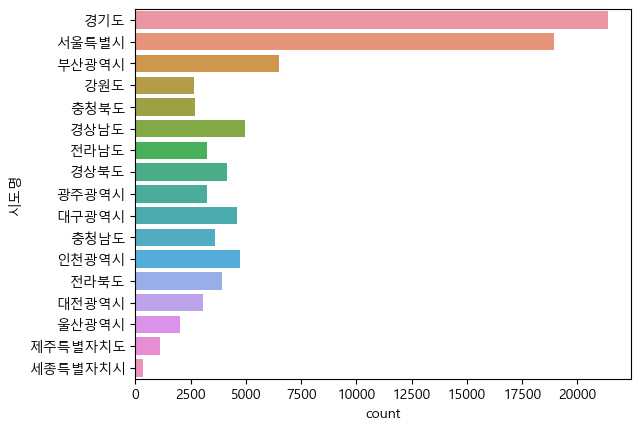

In [93]:
#seaborn의 countplot으로 그려보자 / plot으로 그릴 때는 count를 따로 세서 변수로 지정해줘야 했지만
#seaborn에서는 자동으로 된다. 하지만 파일이 클 경우 시간이 오래 걸린다.
sns.countplot(data=df, y="시도명")

#### 데이터 색인하기 / 특정 데이터만 모아서 따로 보기

In [105]:
# 상권업종중분류명이 약국/한약방인 데이터만 가져와서 df_medical이라는 변수에 담기
df_medical = df[df["상권업종중분류명"] == "약국/한약방"].copy()

In [109]:
# 상권업종대분류명이 "의료"인 것 중에 상권업종중분류명만 가지고 와라
df.loc[df["상권업종대분류명"] == "의료", "상권업종중분류명"].value_counts()

상권업종중분류명
병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: count, dtype: int64

In [115]:
#상권업중중분류명이 유사의료업인 것의 개수를 구하라
df_medi = df[df["상권업종중분류명"] == "유사의료업"]
df_medi["상호명"].value_counts().head()

상호명
리원         32
고려수지침      22
대한적십자사     17
헌혈의집       12
고려수지침학회    10
Name: count, dtype: int64

In [119]:
# 상권업종소분류명이 약국인 것과 시도명이 서울특별시인 것을 동시에 만족하는 것만 구하라
df_seoul_drug = df[(df["상권업종소분류명"] =="약국") & (df["시도명"] == "서울특별시")]

### 3.8 구별로 보기

In [124]:
df_seoul_drug_counts = df_seoul_drug["시군구명"].value_counts()
df_seoul_drug_counts.head()

시군구명
강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
Name: count, dtype: int64

In [126]:
df_seoul_drug_ratio = df_seoul_drug["시군구명"].value_counts(normalize=True)

In [131]:
df_seoul_hospital = df[(df["상권업종소분류명"] == "종합병원") & (df["시도명"] == "서울특별시")].copy()

In [132]:
df_seoul_hospital["시군구명"].value_counts()

시군구명
강남구     15
영등포구     8
광진구      6
서초구      6
강동구      5
중구       5
송파구      5
강북구      4
도봉구      4
서대문구     4
양천구      4
성북구      3
강서구      2
중랑구      2
종로구      2
동대문구     2
구로구      2
노원구      2
금천구      2
성동구      2
관악구      2
동작구      1
마포구      1
용산구      1
은평구      1
Name: count, dtype: int64

#### 텍스트 데이터 색인하기

In [136]:
# 색인하기 전에 상호명 중에 종합병원이 아닌 데이터 찾기
# 상호명이 종합병원인 것의 상호명을 데이터를 찾아서 중복되지 않은 값만 배열의 형태로 출력
df_seoul_hospital.loc[~df_seoul_hospital["상호명"].str.contains("종합병원"),"상호명"].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '평화드림여의도성모병원의료기매장', '한양', '백산의료재단친구병원',
       '서울보훈병원', '서울성모병원장례식장꽃배달', '서울대학교병원', '알콜중독및정신질환상담소',
       '강남성모병원장례식장꽃배달', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '원자력병원장례식장', '국민의원', '고려대학교구로병원', '학교법인일송학원',
       '삼성의료원장례식장', '희명스포츠의학센터인공신장실', '연세대학교의과대학강남세브란스', '국립정신병원',
       '코아클리닉', '수서제일의원', '사랑의의원', '한국전력공사부속한일병원', '신촌연세병원', '창동제일의원',
       '영동세브란스병원', '제일성심의원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울이의원',
       '서울대학교병원비상계획외래', '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '독일의원',
       '서울연합의원', '우신향병원', '동부제일병원', '아산재단금강병원', '명곡안연구소', '아산재단서울중앙병원',
       '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원', '한국건강관리협회서울특',
       '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', '실로암의원', 'Y&T성모마취과', '광진성모의원',
       '서울현대의원', '이노신경과의원', '송정훼밀리의원', '서울중앙의원', '영남의료재단', '인제대학교서울백병원',
       '한국필의료재단', '세브란스의원', '가톨릭대학교성바오로병원장례식장', '서울연세의원', '사랑의병원',
       '성삼의료재단미즈메디병원', '씨엠충무병원', '성신의원', '원진재단부설녹색병원', '송파제일의원',
       '카톨릭성모의원', '한양성심의원', '관악

In [142]:
# 꽃배달|의료기|장례식장|상담소|어린이집은 종합병원과 무관하기 때문에
# 전처리를 위해 텍스트를 검색하고 인덱스만 drop_row 변수에 담아 list 형태로 변환합니다.
drop_row = df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달|의료기|장례식장|상담소|어린이집")].index
drop_row = drop_row.tolist()
drop_row

[1917, 2803, 4431, 4644, 7938, 10283, 47008, 60645, 70177]

In [148]:
# 상호명이 의원인 것도 index를 찾아 배열의 형태로 저장하기
drop_row2 = df_seoul_hospital[df_seoul_hospital["상호명"].str.endswith("의원")].index
drop_row2 = drop_row2.tolist()
drop_row2

[8479,
 12854,
 13715,
 14966,
 16091,
 18047,
 20200,
 20415,
 30706,
 32889,
 34459,
 34720,
 35696,
 37251,
 45120,
 49626,
 51575,
 55133,
 56320,
 56404,
 56688,
 57551,
 62113,
 76508]

In [151]:
# drop_row인 것과 drop_row2를 합치기
drop_row = drop_row + drop_row2

In [152]:
# 해당 셀을 삭제하고 삭제 전과 후의 행의 갯수를 비교
print(df_seoul_hospital.shape)
df_seoul_hospital = df_seoul_hospital.drop(drop_row, axis=0)
print(df_seoul_hospital.shape)

(91, 29)
(58, 29)


<Axes: xlabel='시군구명'>

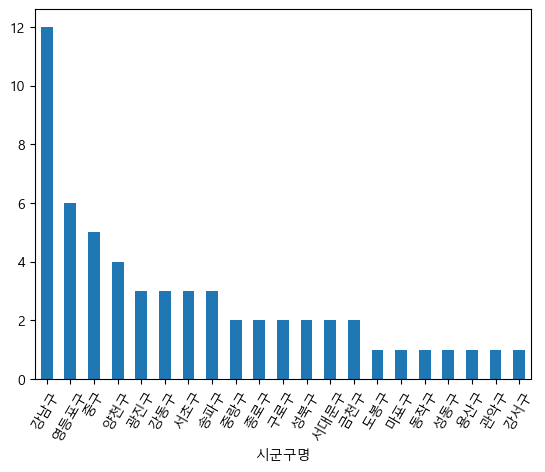

In [159]:
df_seoul_hospital["시군구명"].value_counts().plot.bar(rot=60)

<Axes: xlabel='시군구명', ylabel='count'>

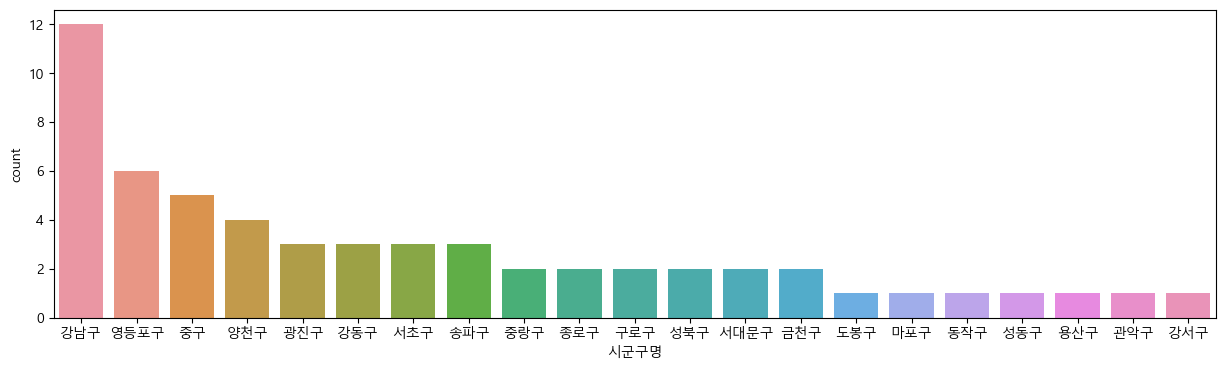

In [166]:
# plt.figure 옵션으로 figure 사이즈 조정하는 방법
# 정렬하기 위해서 order 옵션을 사용하는데, index 값이 필요하므로 높은 순의 index 값만 가지고온다.
plt.figure(figsize=(15, 4))
sns.countplot(data=df_seoul_hospital, x="시군구명",order=df_seoul_hospital["시군구명"].value_counts().index)

In [167]:
#마지막 확인
df_seoul_hospital["상호명"].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '한양', '백산의료재단친구병원', '서울보훈병원',
       '서울대학교병원', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '고려대학교구로병원', '학교법인일송학원', '희명스포츠의학센터인공신장실',
       '연세대학교의과대학강남세브란스', '국립정신병원', '코아클리닉', '한국전력공사부속한일병원', '신촌연세병원',
       '영동세브란스병원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울대학교병원비상계획외래',
       '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '우신향병원', '동부제일병원', '아산재단금강병원',
       '명곡안연구소', '아산재단서울중앙병원', '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원',
       '한국건강관리협회서울특', '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', 'Y&T성모마취과',
       '영남의료재단', '인제대학교서울백병원', '한국필의료재단', '사랑의병원', '성삼의료재단미즈메디병원',
       '씨엠충무병원', '원진재단부설녹색병원', '강남센트럴병원', '우리들병원', '건국대학교병원', '서울적십자병원',
       '서울성모병원응급의료센터', '가톨릭대학교여의도성모병원', '씨엠병원'], dtype=object)

### 특정 지역만 보기

In [168]:
df_seoul = df[df["시도명"] == "서울특별시"].copy()
df_seoul.shape

(18943, 29)

<Axes: xlabel='시군구명', ylabel='count'>

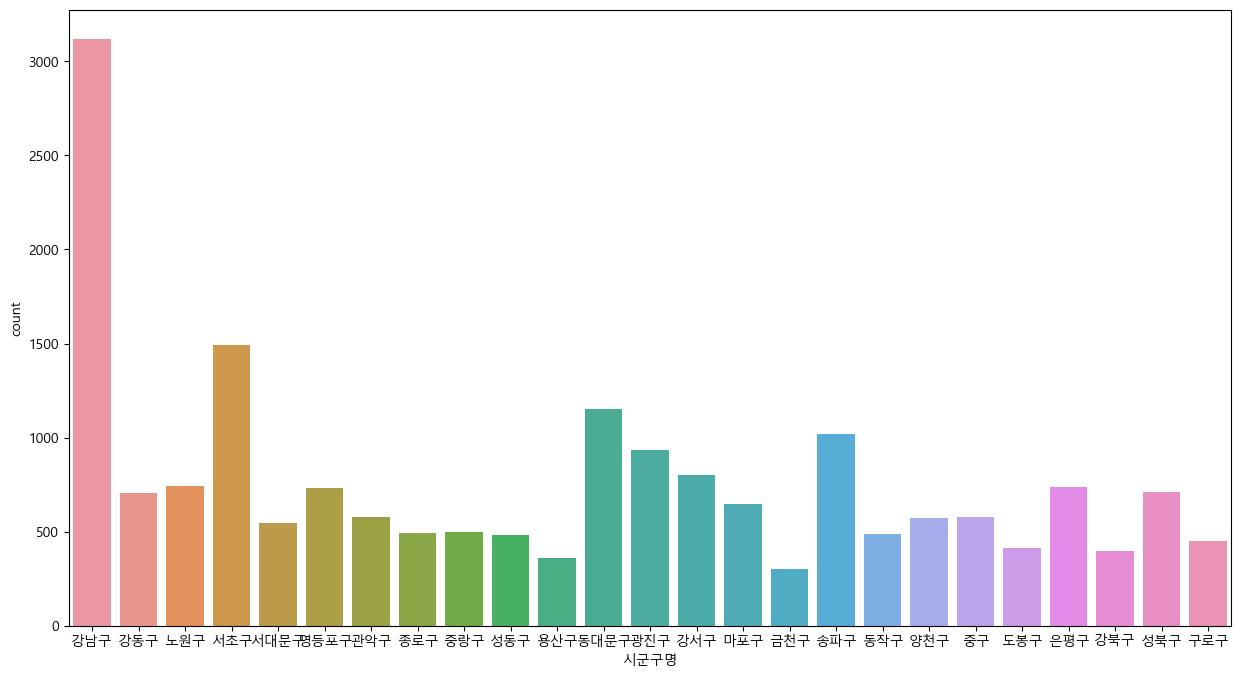

In [171]:
plt.figure(figsize=(15, 8))
sns.countplot(data = df_seoul, x="시군구명")

<Axes: xlabel='경도', ylabel='위도'>

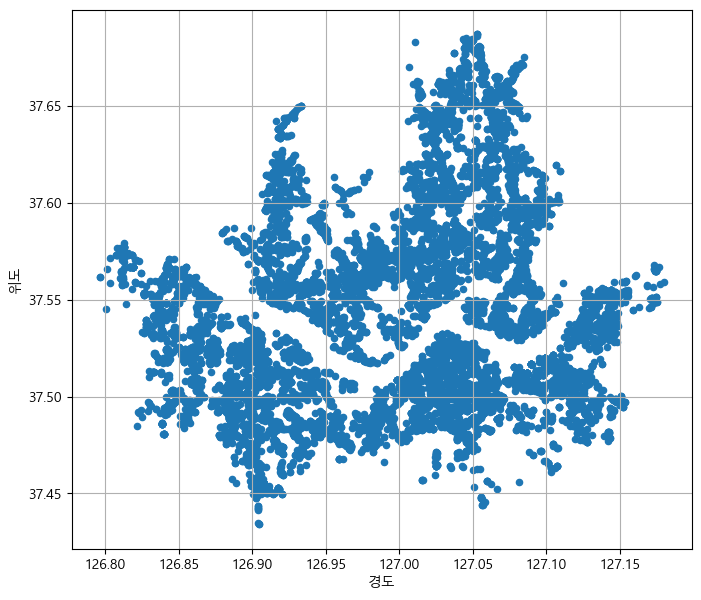

In [174]:
# df_seoul의 경도, 위도, 시군구명을 가지고 scatter plot을 사용해봤다.
df_seoul[["경도", "위도", "시군구명"]].plot.scatter(x="경도", y="위도", figsize=(8,7), grid=True)

<Axes: xlabel='경도', ylabel='위도'>

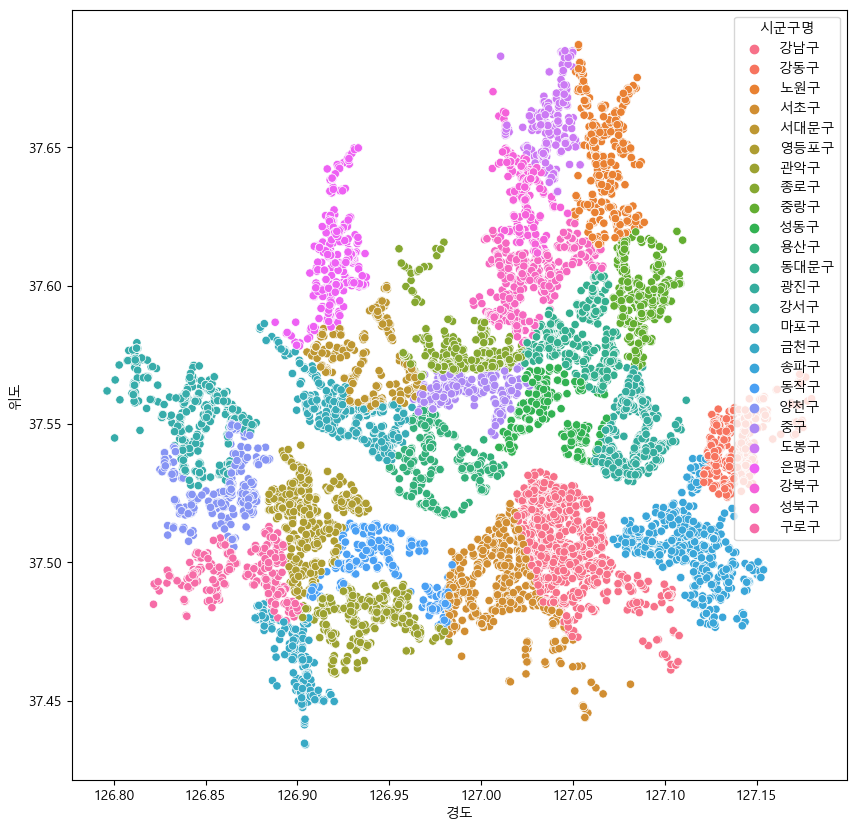

In [176]:
# 같은 것을 seaborn 라이브러리를 통해서 작성해봤는데, hue 속성을 이용해서 시군구에 따라서 색을 다르게 지정했다.
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_seoul, x="경도", y="위도", hue="시군구명")

<Axes: xlabel='경도', ylabel='위도'>

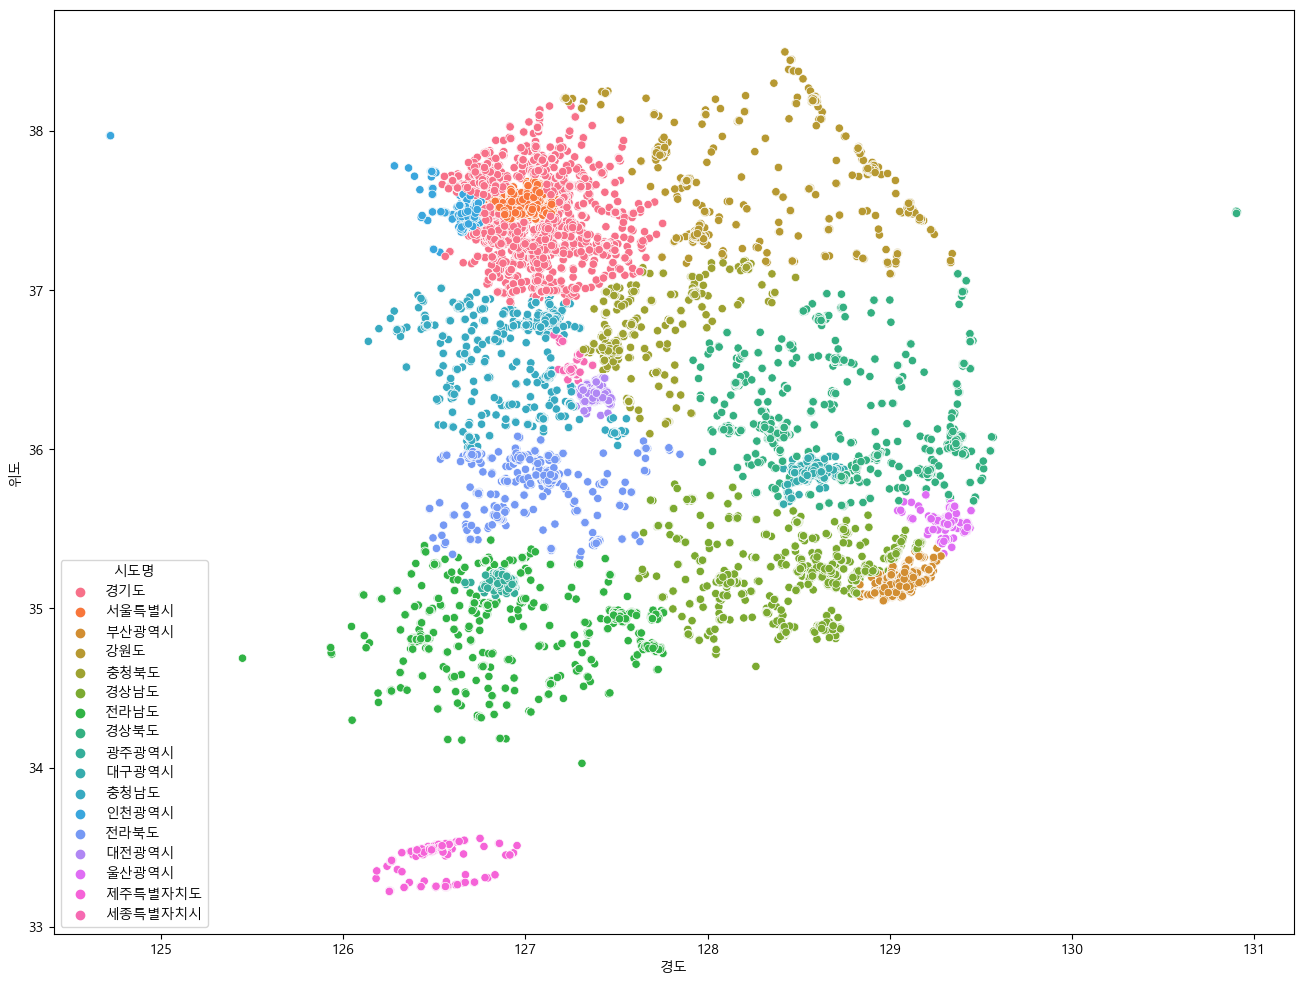

In [180]:
# 우리나라를 기준으로 그리기
plt.figure(figsize=(16,12))
sns.scatterplot(data=df, x="경도", y="위도", hue="시도명")

### 지도 시각화를 위한 라이브러리 사용하기

In [185]:
import folium

In [192]:
#지도의 중심을 지정하기 위해 위도와 경도의 평균을 구하기
latitude = df_seoul_hospital["위도"].mean()
longitude = df_seoul_hospital["경도"].mean()

In [203]:
map = folium.Map(location=[latitude, longitude], zoom_start=12)

for n in df_seoul_hospital.index:
    name = df_seoul_hospital.loc[n, "상호명"]
    address = df_seoul_hospital.loc[n, "도로명주소"]
    popup = f"{name}-{address}"
    location = [df_seoul_hospital.loc[n, "위도"], df_seoul_hospital.loc[n, "경도"]]
    folium.Marker(
        location=location,
        popup = popup
    ).add_to(map)
map